
*******************************************
+ Name: weixiabing
+ Date: 9/11/22
********************************************



In [13]:
import h5py
import numpy as np
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
f = h5py.File('D:\library\Github\Innovative-practice\library\csv\第三学期\data_git_version.h5', 'r')


In [14]:
dataset = f['data'][:,0,0]
dataset = np.array(dataset).reshape(-1, 1)
# 将整型变为float
dataset = dataset.astype('float32')
#归一化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [15]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 3
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions

Epoch 1/100
1186/1186 - 7s - loss: 0.0027 - 7s/epoch - 6ms/step
Epoch 2/100
1186/1186 - 3s - loss: 0.0022 - 3s/epoch - 2ms/step
Epoch 3/100
1186/1186 - 3s - loss: 0.0020 - 3s/epoch - 2ms/step
Epoch 4/100
1186/1186 - 3s - loss: 0.0018 - 3s/epoch - 2ms/step
Epoch 5/100
1186/1186 - 3s - loss: 0.0015 - 3s/epoch - 2ms/step
Epoch 6/100
1186/1186 - 3s - loss: 0.0014 - 3s/epoch - 2ms/step
Epoch 7/100
1186/1186 - 3s - loss: 0.0013 - 3s/epoch - 2ms/step
Epoch 8/100
1186/1186 - 3s - loss: 0.0013 - 3s/epoch - 2ms/step
Epoch 9/100
1186/1186 - 3s - loss: 0.0013 - 3s/epoch - 2ms/step
Epoch 10/100
1186/1186 - 3s - loss: 0.0012 - 3s/epoch - 2ms/step
Epoch 11/100
1186/1186 - 3s - loss: 0.0012 - 3s/epoch - 2ms/step
Epoch 12/100
1186/1186 - 3s - loss: 0.0012 - 3s/epoch - 2ms/step
Epoch 13/100
1186/1186 - 3s - loss: 0.0012 - 3s/epoch - 2ms/step
Epoch 14/100
1186/1186 - 3s - loss: 0.0012 - 3s/epoch - 2ms/step
Epoch 15/100
1186/1186 - 3s - loss: 0.0011 - 3s/epoch - 2ms/step
Epoch 16/100
1186/1186 - 3s - loss

In [16]:
model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)




10/10 [==============================] - 0s 1ms/step


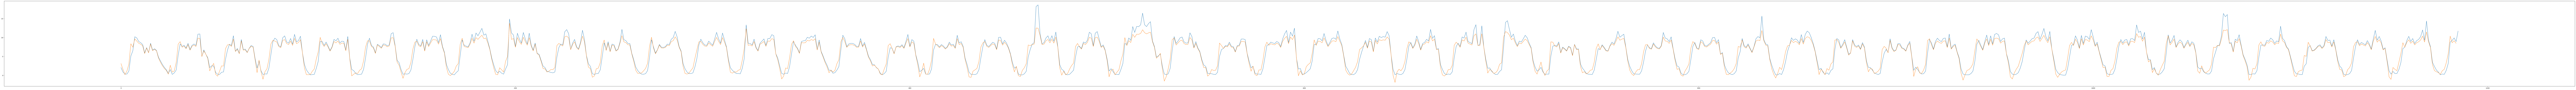

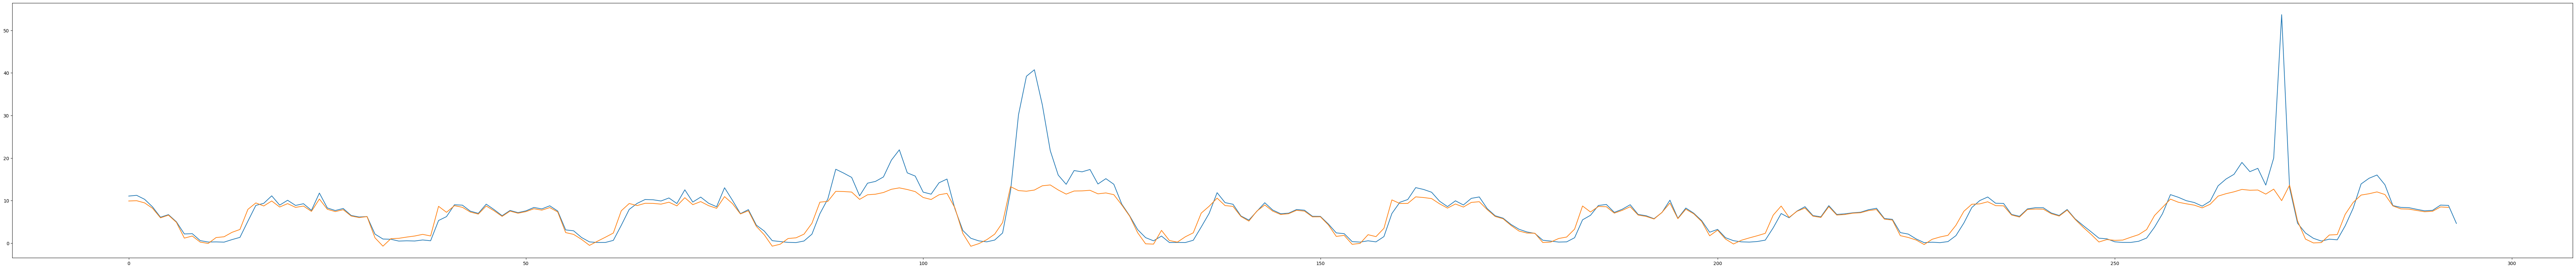

In [20]:
plt.figure( figsize=(300,10) )
plt.plot(trainY)
plt.plot(trainPredict[1:])
plt.show()

plt.figure( figsize=(100,10) )
plt.plot(testY)
plt.plot(testPredict[1:])
plt.show()


In [25]:
from  sklearn import  metrics


def GetRMSE(y_hat,y_test):
    sum = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
    return  sum

def GetMAE(y_hat,y_test):
    sum = metrics.mean_absolute_error(y_test, y_hat)
    return  sum

def GetMAPE(y_hat,y_test):
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum

def GetMAPE_Order(y_hat,y_test):
    #删除test_y 为0元素
    zero_index = np.where(y_test == 0)
    y_hat = np.delete(y_hat,zero_index[0])
    y_test = np.delete(y_test,zero_index[0])
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum

print("RMSE为", GetRMSE(testY, testPredict[:]))
print("MAE为", GetMAE(testY, testPredict[:]))
#print("MAPE为",GetMAPE(hat_y,test_y))
print("MAPE为", GetMAPE_Order(testY, testPredict[:]))


RMSE为 4.2911434
MAE为 2.0243251
MAPE为 53.870707750320435
